In [3]:
import sqlite3
import pandas as pd

In [6]:
D = pd.read_parquet('../data/HK_stocks_151signals.parquet', engine='pyarrow')
D['key'] = D.index

identifier_var_list = ['key', 'id', 'eom', 'ret_exc_lead1m']

### Value signals: You have probably heard of value stocks. At this moment, you don't need to know 
###                the exact definitions of the following variables. 
value_list = ['key', 'id', 'eom', 'at_me', 'be_me', 'bev_mev', 'chcsho_12m', 'debt_me', 'div12m_me', 
              'eqnetis_at', 'eqnpo_12m', 'eqnpo_me', 'eqpo_me', 'fcf_me', 'ival_me', 'netis_at', 'ni_me',
              'ocf_me', 'sale_me', 'ebitda_mev', 'eq_dur']

### Momentum signals:
momentum_list = ['key', 'id', 'eom', 'prc_highprc_252d', 'resff3_6_1', 'resff3_12_1', 'ret_3_1', 'ret_6_1', 
                 'ret_9_1', 'ret_12_1', 'seas_1_1na']

In [7]:
conn = sqlite3.connect('../data/hk_stocks.db')

In [8]:
D[identifier_var_list].to_sql('stock_returns', conn, if_exists='replace', index=False)
D[value_list].to_sql('value_signals', conn, if_exists='replace', index=False)
D[momentum_list].to_sql('momentum_signals', conn, if_exists='replace', index=False)

413279

In [9]:
c = conn.cursor()

In [9]:
query = """
PRAGMA table_info('stock_returns')
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(0, 'key', 'INTEGER', 0, None, 0),
 (1, 'id', 'REAL', 0, None, 0),
 (2, 'eom', 'TIMESTAMP', 0, None, 0),
 (3, 'ret_exc_lead1m', 'REAL', 0, None, 0)]

In [18]:
query = """
SELECT key, id, eom, be_me
FROM value_signals;
"""

bm_ratio = c.execute(query)

In [20]:
bm_ratio.fetchall()

[(13581261, 310108801.0, '1990-12-31 00:00:00', 0.5855084837999145),
 (13581262, 310108801.0, '1991-01-31 00:00:00', 0.5270208298761084),
 (13581263, 310108801.0, '1991-02-28 00:00:00', 0.5028971434512038),
 (13581264, 310108801.0, '1991-03-31 00:00:00', 0.4103099817587193),
 (13581265, 310108801.0, '1991-04-30 00:00:00', 0.4885601937712942),
 (13581266, 310108801.0, '1991-05-31 00:00:00', 0.4904688945774288),
 (13581267, 310108801.0, '1991-06-30 00:00:00', 0.4894916295965782),
 (13581268, 310108801.0, '1991-07-31 00:00:00', 0.4115143517586514),
 (13581269, 310108801.0, '1991-08-31 00:00:00', 0.4095998927774939),
 (13581270, 310108801.0, '1991-09-30 00:00:00', 0.4227838917940972),
 (13581271, 310108801.0, '1991-10-31 00:00:00', 0.43721487538227527),
 (13581272, 310108801.0, '1991-11-30 00:00:00', 0.4482584584395113),
 (13581273, 310108801.0, '1991-12-31 00:00:00', 0.43564244052307155),
 (13581274, 310108801.0, '1992-01-31 00:00:00', 0.40965171498758934),
 (13581275, 310108801.0, '1992-

In [19]:
for ii in range(5):
    print(bm_ratio.fetchone())

(13581256, 310108801.0, '1990-07-31 00:00:00', 0.5526027365710913)
(13581257, 310108801.0, '1990-08-31 00:00:00', 0.6058262454972185)
(13581258, 310108801.0, '1990-09-30 00:00:00', 0.7042163901924002)
(13581259, 310108801.0, '1990-10-31 00:00:00', 0.6148997253988562)
(13581260, 310108801.0, '1990-11-30 00:00:00', 0.6008205497148034)


In [21]:
query = """
SELECT *
FROM stock_returns;
"""

stock_returns = c.execute(query)

for ii in range(5):
    print(stock_returns.fetchone())

(13581256, 310108801.0, '1990-07-31 00:00:00', -0.09400676194570491)
(13581257, 310108801.0, '1990-08-31 00:00:00', -0.14569978347999013)
(13581258, 310108801.0, '1990-09-30 00:00:00', 0.15107615827555618)
(13581259, 310108801.0, '1990-10-31 00:00:00', 0.017782245901352873)
(13581260, 310108801.0, '1990-11-30 00:00:00', 0.020162740476097583)


In [22]:
query = """
SELECT DISTINCT eom 
FROM stock_returns;
"""

eom_stocks = c.execute(query)

eom_stocks.fetchall()

[('1990-07-31 00:00:00',),
 ('1990-08-31 00:00:00',),
 ('1990-09-30 00:00:00',),
 ('1990-10-31 00:00:00',),
 ('1990-11-30 00:00:00',),
 ('1990-12-31 00:00:00',),
 ('1991-01-31 00:00:00',),
 ('1991-02-28 00:00:00',),
 ('1991-03-31 00:00:00',),
 ('1991-04-30 00:00:00',),
 ('1991-05-31 00:00:00',),
 ('1991-06-30 00:00:00',),
 ('1991-07-31 00:00:00',),
 ('1991-08-31 00:00:00',),
 ('1991-09-30 00:00:00',),
 ('1991-10-31 00:00:00',),
 ('1991-11-30 00:00:00',),
 ('1991-12-31 00:00:00',),
 ('1992-01-31 00:00:00',),
 ('1992-02-29 00:00:00',),
 ('1992-03-31 00:00:00',),
 ('1992-04-30 00:00:00',),
 ('1992-05-31 00:00:00',),
 ('1992-06-30 00:00:00',),
 ('1992-07-31 00:00:00',),
 ('1992-08-31 00:00:00',),
 ('1992-09-30 00:00:00',),
 ('1992-10-31 00:00:00',),
 ('1992-11-30 00:00:00',),
 ('1992-12-31 00:00:00',),
 ('1993-01-31 00:00:00',),
 ('1993-02-28 00:00:00',),
 ('1993-03-31 00:00:00',),
 ('1993-04-30 00:00:00',),
 ('1993-05-31 00:00:00',),
 ('1993-06-30 00:00:00',),
 ('1993-07-31 00:00:00',),
 

In [31]:
### "LIMIT 5 OFFSET 5" means that we want to retrieve five rows starting from row 5.
### The first number is where to start, and the second is the number of rows to retrieve. 
### Anything between /* and */ (and after --) is comment text. 
query = """
/* Comments: We want to select several columns */
SELECT key, id, eom, be_me 
FROM value_signals
LIMIT 7 OFFSET 0;  -- Comments: The first number is where to start. The second is the number of rows to retrieve. First row is Row 0
"""
bm_ratio = c.execute(query)

bm_ratio.fetchall()

[(13581256, 310108801.0, '1990-07-31 00:00:00', 0.5526027365710913),
 (13581257, 310108801.0, '1990-08-31 00:00:00', 0.6058262454972185),
 (13581258, 310108801.0, '1990-09-30 00:00:00', 0.7042163901924002),
 (13581259, 310108801.0, '1990-10-31 00:00:00', 0.6148997253988562),
 (13581260, 310108801.0, '1990-11-30 00:00:00', 0.6008205497148034),
 (13581261, 310108801.0, '1990-12-31 00:00:00', 0.5855084837999145),
 (13581262, 310108801.0, '1991-01-31 00:00:00', 0.5270208298761084)]

In [41]:
query = """
SELECT *
FROM stock_returns
ORDER BY id, eom DESC;   -- Sorted id by ascending order and then eom by descending order
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868363, 301393202.0, '2021-12-31 00:00:00', 0.02266665467705613),
 (12868362, 301393202.0, '2021-11-30 00:00:00', 0.08473054026007891),
 (12868361, 301393202.0, '2021-10-31 00:00:00', -0.13085273549157622),
 (12868360, 301393202.0, '2021-09-30 00:00:00', -0.0017019572086410157),
 (12868359, 301393202.0, '2021-08-31 00:00:00', 0.031007386999801274),
 (12868358, 301393202.0, '2021-07-31 00:00:00', 0.12654515651324225),
 (12868357, 301393202.0, '2021-06-30 00:00:00', -0.09146188518809095),
 (12868356, 301393202.0, '2021-05-31 00:00:00', 0.08113883925635446),
 (12868355, 301393202.0, '2021-04-30 00:00:00', 0.01870256948632457),
 (12868354, 301393202.0, '2021-03-31 00:00:00', -0.037655163907258135),
 (12868353, 301393202.0, '2021-02-28 00:00:00', -0.008973032986295704),
 (12868352, 301393202.0, '2021-01-31 00:00:00', 0.3476109582212779),
 (12868351, 301393202.0, '2020-12-31 00:00:00', -0.18494252476429207),
 (12868350, 301393202.0, '2020-11-30 00:00:00', 0.0972651169615481),
 (12868349,

In [54]:
query = """
SELECT *
FROM stock_returns
WHERE ret_exc_lead1m IS NOT NULL   -- Retrieve the rows if the returns are not missing
ORDER BY id, eom
LIMIT 10;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868237, 301393202.0, '2011-06-30 00:00:00', 0.13404823939967833),
 (12868238, 301393202.0, '2011-07-31 00:00:00', -0.1615469025443365),
 (12868239, 301393202.0, '2011-08-31 00:00:00', -0.21376754115719968),
 (12868240, 301393202.0, '2011-09-30 00:00:00', 0.16887864056664223),
 (12868241, 301393202.0, '2011-10-31 00:00:00', -0.24450073146216167),
 (12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12868243, 301393202.0, '2011-12-31 00:00:00', 0.009385934172108033),
 (12868244, 301393202.0, '2012-01-31 00:00:00', 0.13147595804412993),
 (12868245, 301393202.0, '2012-02-29 00:00:00', 0.01496122566737478),
 (12868246, 301393202.0, '2012-03-31 00:00:00', 0.06604683287802665)]

In [57]:
query = """
SELECT *
FROM stock_returns
WHERE ret_exc_lead1m BETWEEN -0.1 AND 0.1
ORDER BY id, eom
LIMIT 10;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868243, 301393202.0, '2011-12-31 00:00:00', 0.009385934172108033),
 (12868245, 301393202.0, '2012-02-29 00:00:00', 0.01496122566737478),
 (12868246, 301393202.0, '2012-03-31 00:00:00', 0.06604683287802665),
 (12868247, 301393202.0, '2012-04-30 00:00:00', -0.055051522857254585),
 (12868248, 301393202.0, '2012-05-31 00:00:00', -0.07746203426343182),
 (12868249, 301393202.0, '2012-06-30 00:00:00', 0.018694877103064864),
 (12868250, 301393202.0, '2012-07-31 00:00:00', 0.09360049957789174),
 (12868251, 301393202.0, '2012-08-31 00:00:00', 0.031054650182795334),
 (12868252, 301393202.0, '2012-09-30 00:00:00', 0.08214406181034624),
 (12868253, 301393202.0, '2012-10-31 00:00:00', 0.032230872124440535)]

In [60]:
query = """
SELECT *
FROM stock_returns
WHERE (ret_exc_lead1m >= -0.1 OR ret_exc_lead1m  <= 0.1)  AND ret_exc_lead1m >= 0.5-- AND / OR are available
ORDER BY id, eom
LIMIT 10;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868349, 301393202.0, '2020-10-31 00:00:00', 0.6055248480533771),
 (12939075, 301565201.0, '1995-12-31 00:00:00', 0.5108542650091286),
 (12939094, 301565201.0, '1997-07-31 00:00:00', 0.5084317669296393),
 (12939107, 301565201.0, '1998-08-31 00:00:00', 0.6223476966219076),
 (12939123, 301565201.0, '1999-12-31 00:00:00', 0.608286359632981),
 (12939198, 301565201.0, '2006-03-31 00:00:00', 0.5232964562010688),
 (12939213, 301565201.0, '2007-06-30 00:00:00', 0.6838678906050226),
 (12952710, 301569701.0, '1993-11-30 00:00:00', 0.6738806111148733),
 (12952760, 301569701.0, '1998-01-31 00:00:00', 0.5671818482154684),
 (12963065, 301574903.0, '1998-09-30 00:00:00', 0.7881577880345717)]

In [61]:
query = """
SELECT *
FROM stock_returns
WHERE eom IN ('2011-11-30 00:00:00', '2000-01-31 00:00:00') -- WHERE NOT also available
ORDER BY id, eom
LIMIT 10;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12879078, 301510501.0, '2000-01-31 00:00:00', 0.3683978039860753),
 (12889857, 301549801.0, '2000-01-31 00:00:00', -0.0771686335868575),
 (12889999, 301549801.0, '2011-11-30 00:00:00', -0.013019812927470675),
 (12900765, 301553001.0, '2000-01-31 00:00:00', -0.09183895343949139),
 (12900907, 301553001.0, '2011-11-30 00:00:00', 0.13457882556971845),
 (12939124, 301565201.0, '2000-01-31 00:00:00', -0.0806473299175891),
 (12939266, 301565201.0, '2011-11-30 00:00:00', 0.02146826306139027),
 (12952784, 301569701.0, '2000-01-31 00:00:00', -0.21642612466807915),
 (12952926, 301569701.0, '2011-11-30 00:00:00', 0.03634218982730553)]

In [63]:
query = """
SELECT *
FROM stock_returns
WHERE id LIKE '%2023%'   -- Any value that contains "2023" will be retrieved
ORDER BY id, eom
LIMIT 10;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(14922455, 320231801.0, '1993-05-31 00:00:00', -0.10063599671804481),
 (14922456, 320231801.0, '1993-06-30 00:00:00', 0.037100575898807234),
 (14922457, 320231801.0, '1993-07-31 00:00:00', -0.176927767190967),
 (14922458, 320231801.0, '1993-08-31 00:00:00', -0.0554354539030921),
 (14922459, 320231801.0, '1993-09-30 00:00:00', 0.11466360159090176),
 (14922460, 320231801.0, '1993-10-31 00:00:00', -0.08664958538611528),
 (14922461, 320231801.0, '1993-11-30 00:00:00', -0.002458038984110663),
 (14922462, 320231801.0, '1993-12-31 00:00:00', -0.11549472363398891),
 (14922463, 320231801.0, '1994-01-31 00:00:00', -0.06726901528081695),
 (14922464, 320231801.0, '1994-02-28 00:00:00', -0.22401419738491118)]

In [64]:
query = """
SELECT AVG(ret_exc_lead1m)
FROM stock_returns
WHERE id == 320221201;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(0.008019534695916304,)]

In [65]:
query = """
SELECT COUNT(ret_exc_lead1m) -- Count the number of rows in a column
FROM stock_returns
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(410758,)]

In [66]:
query = """
SELECT COUNT(*) -- Count the total number of rows
FROM stock_returns
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(413279,)]

In [69]:
query = """
SELECT MAX(ret_exc_lead1m) -- MIN also available
FROM stock_returns
WHERE id == 320221201;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(0.6125935004812345,)]

In [70]:
query = """
SELECT SUM(ret_exc_lead1m)
FROM stock_returns
WHERE id == 320221201;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(3.0313841150563627,)]

In [71]:
query = """
SELECT SUM(ret_exc_lead1m) as ret_sum, -- Make sure you added the comma
       MIN(ret_exc_lead1m) as ret_min, 
       MAX(ret_exc_lead1m) as ret_max
FROM stock_returns
WHERE id == 320221201;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(3.0313841150563627, -0.3741450206813006, 0.6125935004812345)]

In [84]:
# Suppose now that you want to count the number of time-series observations for each stock when their stock returns are no less than 10%.
# However, you want to select the firms with
# observations more than 200 months.

query = """
SELECT id, COUNT(*) 
FROM stock_returns
WHERE ret_exc_lead1m >= -0.1 -- WHERE filters before grouping
GROUP BY id
HAVING COUNT(*) >= 200;  -- HAVING filters after grouping
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(301549801.0, 358),
 (301553001.0, 343),
 (301565201.0, 330),
 (301569701.0, 333),
 (301574903.0, 339),
 (301576901.0, 209),
 (301584001.0, 347),
 (301653801.0, 334),
 (301659001.0, 370),
 (301659101.0, 309),
 (301662101.0, 326),
 (301852602.0, 363),
 (301864901.0, 340),
 (301908301.0, 315),
 (301938001.0, 206),
 (301942101.0, 334),
 (301962601.0, 342),
 (302138301.0, 343),
 (302401603.0, 324),
 (302579101.0, 206),
 (302865301.0, 277),
 (302878401.0, 224),
 (303074701.0, 252),
 (303164801.0, 221),
 (306284401.0, 264),
 (306306401.0, 234),
 (306415901.0, 229),
 (306433601.0, 230),
 (306566201.0, 267),
 (310054001.0, 287),
 (310056201.0, 343),
 (310064801.0, 339),
 (310065201.0, 366),
 (310066501.0, 369),
 (310108801.0, 343),
 (310110201.0, 356),
 (310110301.0, 361),
 (310119301.0, 307),
 (310119401.0, 346),
 (310121701.0, 314),
 (310157101.0, 310),
 (310157201.0, 352),
 (310178402.0, 270),
 (310180701.0, 312),
 (310181202.0, 305),
 (310181601.0, 316),
 (310199901.0, 325),
 (310201002.0

In [85]:
query = """
SELECT *
FROM stock_returns
WHERE key IN (SELECT key
              FROM value_signals
              WHERE be_me > 0.5);
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(13581256, 310108801.0, '1990-07-31 00:00:00', -0.09400676194570491),
 (13581257, 310108801.0, '1990-08-31 00:00:00', -0.14569978347999013),
 (13581258, 310108801.0, '1990-09-30 00:00:00', 0.15107615827555618),
 (13581259, 310108801.0, '1990-10-31 00:00:00', 0.017782245901352873),
 (13581260, 310108801.0, '1990-11-30 00:00:00', 0.020162740476097583),
 (13581261, 310108801.0, '1990-12-31 00:00:00', 0.10634087906704814),
 (13581262, 310108801.0, '1991-01-31 00:00:00', 0.04320242424320072),
 (13581263, 310108801.0, '1991-02-28 00:00:00', 0.22126074089995698),
 (13581282, 310108801.0, '1992-09-30 00:00:00', 0.11850107442912107),
 (13581285, 310108801.0, '1992-12-31 00:00:00', 0.030780696856062193),
 (13581286, 310108801.0, '1993-01-31 00:00:00', 0.15227501574927174),
 (13581308, 310108801.0, '1994-11-30 00:00:00', -0.026606665663132145),
 (13581309, 310108801.0, '1994-12-31 00:00:00', -0.13705369159744468),
 (13581310, 310108801.0, '1995-01-31 00:00:00', 0.2307526166270138),
 (13581313, 3

In [86]:
query = """
SELECT key,
       id, 
       eom, 
       ret_exc_lead1m, 
       (SELECT be_me 
        FROM value_signals
        WHERE value_signals.key = stock_returns.key) AS be_me 
FROM stock_returns
ORDER BY id, eom;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

#Takes at least 3-4 mins to run subqueries

In [10]:
query = """
SELECT stock_returns.key,  -- try key
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, be_me
FROM stock_returns, value_signals
WHERE value_signals.key = stock_returns.key; -- VERY IMPORTANT TO USE THE WHERE CLAUSE TO MATCH THE KEY
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

#Identical to the previous code

[(13581256,
  310108801.0,
  '1990-07-31 00:00:00',
  -0.09400676194570491,
  0.5526027365710913),
 (13581257,
  310108801.0,
  '1990-08-31 00:00:00',
  -0.14569978347999013,
  0.6058262454972185),
 (13581258,
  310108801.0,
  '1990-09-30 00:00:00',
  0.15107615827555618,
  0.7042163901924002),
 (13581259,
  310108801.0,
  '1990-10-31 00:00:00',
  0.017782245901352873,
  0.6148997253988562),
 (13581260,
  310108801.0,
  '1990-11-30 00:00:00',
  0.020162740476097583,
  0.6008205497148034),
 (13581261,
  310108801.0,
  '1990-12-31 00:00:00',
  0.10634087906704814,
  0.5855084837999145),
 (13581262,
  310108801.0,
  '1991-01-31 00:00:00',
  0.04320242424320072,
  0.5270208298761084),
 (13581263,
  310108801.0,
  '1991-02-28 00:00:00',
  0.22126074089995698,
  0.5028971434512038),
 (13581264,
  310108801.0,
  '1991-03-31 00:00:00',
  -0.033720972104480905,
  0.4103099817587193),
 (13581265,
  310108801.0,
  '1991-04-30 00:00:00',
  0.010620913785752743,
  0.4885601937712942),
 (13581266,
 

In [11]:
query = """
SELECT stock_returns.key,  -- try key
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, be_me
FROM stock_returns INNER JOIN value_signals
 ON value_signals.key = stock_returns.key;   -- The same as the previous WHERE clause
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

#Identical to the previous code

[(13581256,
  310108801.0,
  '1990-07-31 00:00:00',
  -0.09400676194570491,
  0.5526027365710913),
 (13581257,
  310108801.0,
  '1990-08-31 00:00:00',
  -0.14569978347999013,
  0.6058262454972185),
 (13581258,
  310108801.0,
  '1990-09-30 00:00:00',
  0.15107615827555618,
  0.7042163901924002),
 (13581259,
  310108801.0,
  '1990-10-31 00:00:00',
  0.017782245901352873,
  0.6148997253988562),
 (13581260,
  310108801.0,
  '1990-11-30 00:00:00',
  0.020162740476097583,
  0.6008205497148034),
 (13581261,
  310108801.0,
  '1990-12-31 00:00:00',
  0.10634087906704814,
  0.5855084837999145),
 (13581262,
  310108801.0,
  '1991-01-31 00:00:00',
  0.04320242424320072,
  0.5270208298761084),
 (13581263,
  310108801.0,
  '1991-02-28 00:00:00',
  0.22126074089995698,
  0.5028971434512038),
 (13581264,
  310108801.0,
  '1991-03-31 00:00:00',
  -0.033720972104480905,
  0.4103099817587193),
 (13581265,
  310108801.0,
  '1991-04-30 00:00:00',
  0.010620913785752743,
  0.4885601937712942),
 (13581266,
 

In [14]:
query = """
SELECT stock_returns.key,  
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, be_me, ret_12_1
FROM stock_returns, value_signals, momentum_signals
WHERE value_signals.key = stock_returns.key AND momentum_signals.key = stock_returns.key 
        AND ret_12_1 > 0.5 AND be_me > 0.5;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(13581256,
  310108801.0,
  '1990-07-31 00:00:00',
  -0.09400676194570491,
  0.5526027365710913,
  0.5973038530305139),
 (13581257,
  310108801.0,
  '1990-08-31 00:00:00',
  -0.14569978347999013,
  0.6058262454972185,
  0.7201853732870784),
 (13581362,
  310108801.0,
  '1999-05-31 00:00:00',
  0.07771699877853348,
  0.5839675815721967,
  0.6937229388656563),
 (13581363,
  310108801.0,
  '1999-06-30 00:00:00',
  -0.01851511119712363,
  0.5398035544261716,
  0.7054208313774151),
 (13581364,
  310108801.0,
  '1999-07-31 00:00:00',
  -0.011669198971083105,
  0.5808633174543874,
  1.091749017581467),
 (13581365,
  310108801.0,
  '1999-08-31 00:00:00',
  -0.04477151297967834,
  0.5854256560749563,
  1.308454217629575),
 (13581366,
  310108801.0,
  '1999-09-30 00:00:00',
  0.09058308177518254,
  0.6104966235917361,
  0.9138689394146597),
 (13581370,
  310108801.0,
  '2000-01-31 00:00:00',
  0.04883753878457891,
  0.628948167993536,
  0.8651089384261121),
 (13581371,
  310108801.0,
  '2000-02

### Inner Join vs LEFT Outer Join
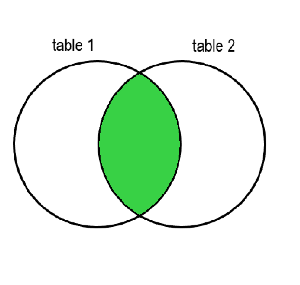
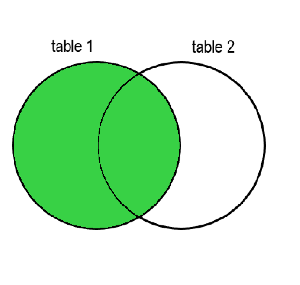

In [15]:
query = """
SELECT stock_returns.key,  
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, be_me
FROM value_signals LEFT OUTER JOIN stock_returns
 ON value_signals.key = stock_returns.key;  
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(13581256,
  310108801.0,
  '1990-07-31 00:00:00',
  -0.09400676194570491,
  0.5526027365710913),
 (13581257,
  310108801.0,
  '1990-08-31 00:00:00',
  -0.14569978347999013,
  0.6058262454972185),
 (13581258,
  310108801.0,
  '1990-09-30 00:00:00',
  0.15107615827555618,
  0.7042163901924002),
 (13581259,
  310108801.0,
  '1990-10-31 00:00:00',
  0.017782245901352873,
  0.6148997253988562),
 (13581260,
  310108801.0,
  '1990-11-30 00:00:00',
  0.020162740476097583,
  0.6008205497148034),
 (13581261,
  310108801.0,
  '1990-12-31 00:00:00',
  0.10634087906704814,
  0.5855084837999145),
 (13581262,
  310108801.0,
  '1991-01-31 00:00:00',
  0.04320242424320072,
  0.5270208298761084),
 (13581263,
  310108801.0,
  '1991-02-28 00:00:00',
  0.22126074089995698,
  0.5028971434512038),
 (13581264,
  310108801.0,
  '1991-03-31 00:00:00',
  -0.033720972104480905,
  0.4103099817587193),
 (13581265,
  310108801.0,
  '1991-04-30 00:00:00',
  0.010620913785752743,
  0.4885601937712942),
 (13581266,
 

In [16]:
query = """
SELECT *
FROM stock_returns
WHERE ret_exc_lead1m <= -0.1
UNION
SELECT *
FROM stock_returns
WHERE ret_exc_lead1m >= 0.1   -- equivalent to WHERE ret_exc_lead1m <= -0.1 OR ret_exc_lead1m >= 0.1
ORDER BY id, eom;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(12868237, 301393202.0, '2011-06-30 00:00:00', 0.13404823939967833),
 (12868238, 301393202.0, '2011-07-31 00:00:00', -0.1615469025443365),
 (12868239, 301393202.0, '2011-08-31 00:00:00', -0.21376754115719968),
 (12868240, 301393202.0, '2011-09-30 00:00:00', 0.16887864056664223),
 (12868241, 301393202.0, '2011-10-31 00:00:00', -0.24450073146216167),
 (12868242, 301393202.0, '2011-11-30 00:00:00', 0.2574776070434337),
 (12868244, 301393202.0, '2012-01-31 00:00:00', 0.13147595804412993),
 (12868261, 301393202.0, '2013-06-30 00:00:00', 0.13770149575689952),
 (12868269, 301393202.0, '2014-02-28 00:00:00', 0.12196186992849914),
 (12868274, 301393202.0, '2014-07-31 00:00:00', 0.10772963746354589),
 (12868278, 301393202.0, '2014-11-30 00:00:00', -0.10849568090873993),
 (12868281, 301393202.0, '2015-02-28 00:00:00', 0.10273350953682268),
 (12868291, 301393202.0, '2015-12-31 00:00:00', -0.14322808795861547),
 (12868292, 301393202.0, '2016-01-31 00:00:00', 0.13053403764101912),
 (12868293, 30139

In [17]:
conn.close()